# SciPy Tutorial

[add description of what scipy is]

add little picture or something??

#### Capabilities

[what can it do; variety of different functions]

## Tutorial

Follow the steps below to ...

#### Installation

For this tutorial we are going to be using the Palmer Penguins data set [more info on palmer penguins]. First we will need to install this library.

- Run this section in the terminal:  ``` pip install palmerpenguins```

#### Import

To run some of the functions you'll need to import some other libraries that work with ```SciPy```.

Run the cell below:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import scipy.stats as stats


Load the palmerpenguins data set from palmerpenguins by running the cell below:

In [1]:
from palmerpenguins import load_penguins
penguins = load_penguins()


ModuleNotFoundError: No module named 'palmerpenguins'

Let's take a look at the data set.

In [4]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Now we're ready to start using ```scipy.stats```. 

### ANOVA

[add info about using scipy for anova/ a bit about what an anova is and what variables we're comparing]

In [9]:
# anova from scipy.stats

# Filter out any missing values in the 'bill_length_mm' and 'species' columns
filtered_data = penguins.dropna(subset=['bill_length_mm', 'species'])


In [16]:

# Extract data for each penguin species
species_groups = [filtered_data[filtered_data['species'] == species]['bill_length_mm'] for species in filtered_data['species'].unique()]
type(species_groups)

list

In [19]:

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(*species_groups)

# Print results
print("F-statistic:", f_statistic)
print("P-value:", p_value)


F-statistic: 410.6002550405077
P-value: 2.6946137388895484e-91


In [18]:

# Interpret the results
alpha = 0.05  # Set your significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in bill lengths among penguin species.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in bill lengths among penguin species.")

Reject the null hypothesis: There is a significant difference in bill lengths among penguin species.


### Corelation Coefficient

The correlation coefficient is a measure that tells us the strength of the linear relationship between two variables. This value ranges from -1 to 1 where -1 shows a perfect negative/inverse correlation, 1 shows a perfect positive/ direct relationship, and 0 is no linear relationship. In this tutorial we will be looking at both Pearson and Spearman correlation coefficients. 

Pearson Correlation:
- Measures only linear relationships
- Ratio between the covariance of two variables and the product of their standard deviations

Spearman:
- Ranks data instead of relying on their actual values, making it suitable for data that is not normally distributed or ordinal data.
- While our example here using palmerpenguins show a linear monotonic relationship, Spearman can also be used for nonlinear monotonic relationships

In [5]:
# Filter out any missing values in the 'bill_length_mm' and 'bill_depth_mm' columns
filtered_data = penguins.dropna(subset=['bill_length_mm', 'body_mass_g'])

# Extract the data for the two variables of interest
x_data = filtered_data['bill_length_mm']
y_data = filtered_data['body_mass_g']

# Calculate Pearson correlation coefficient
pearson_corr, _ = stats.pearsonr(x_data, y_data)

# Calculate Spearman correlation coefficient
spearman_corr, _ = stats.spearmanr(x_data, y_data)

# Print the results
print("Pearson Correlation Coefficient:", pearson_corr)
print("Spearman Correlation Coefficient:", spearman_corr)

Pearson Correlation Coefficient: 0.5951098244376302
Spearman Correlation Coefficient: 0.5838003194455482


### Curve Fit/ Linear Regression

[info about this function and what it does]

In [24]:
penguins_main = load_penguins()
penguins_main.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [25]:
penguins_main.year.unique()

array([2007, 2008, 2009], dtype=int64)

In [26]:
# interpolate

flipper_length = penguins_main["flipper_length_mm"].values
body_mass = penguins_main["body_mass_g"].values


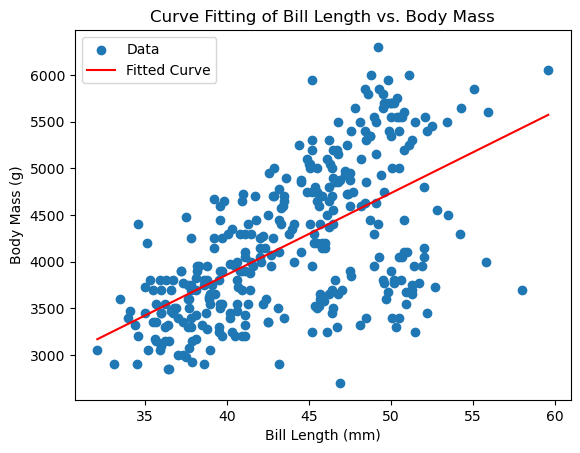

Fitted Parameters:
a (slope): 87.41527681343267
b (intercept): 362.3067321707127


In [33]:
from scipy.optimize import curve_fit

# Filter out any missing values in the 'bill_length_mm' and 'bill_depth_mm' columns
filtered_data = penguins_main.dropna(subset=['bill_length_mm', 'body_mass_g'])

# Define the function to fit (you can choose an appropriate function)
def func(x, a, b):
    return a * x + b

# Extract the data
x_data = filtered_data['bill_length_mm']
y_data = filtered_data['body_mass_g']

# Perform curve fitting
params, covariance = curve_fit(func, x_data, y_data)

# Extract the fitted parameters
a_fit, b_fit = params

# Create a curve using the fitted parameters
x_curve = np.linspace(min(x_data), max(x_data), 100)
y_curve = func(x_curve, a_fit, b_fit)

# Plot the original data and the fitted curve
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_curve, y_curve, 'r', label='Fitted Curve')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Body Mass (g)')
plt.legend()
plt.title('Curve Fitting of Bill Length vs. Body Mass')
plt.show()

# Print the fitted parameters
print("Fitted Parameters:")
print("a (slope):", a_fit)
print("b (intercept):", b_fit)

Slope (Coefficient): 87.41527705287548
Intercept: 362.3067216539225
R-squared: 0.354155703142187
P-value: 3.8082828420178576e-34
Standard Error of the Estimate: 6.401985325852157


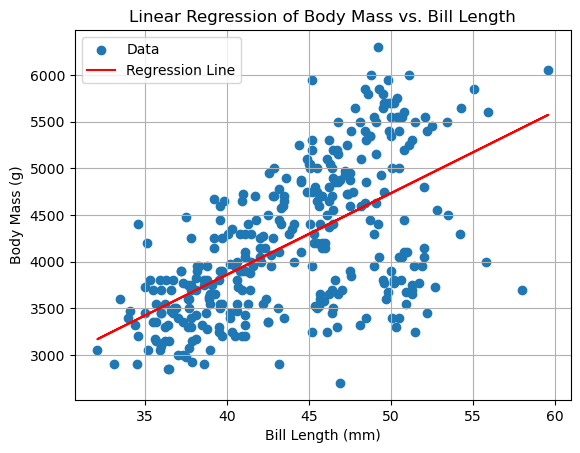

In [4]:
penguins = sns.load_dataset("penguins")

# Filter out any missing values in the 'bill_length_mm' and 'body_mass_g' columns
filtered_data = penguins.dropna(subset=['bill_length_mm', 'body_mass_g'])

# Extract the data for the two variables of interest
x_data = filtered_data['bill_length_mm']
y_data = filtered_data['body_mass_g']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x_data, y_data)

# Print the regression results
print("Slope (Coefficient):", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)
print("P-value:", p_value)
print("Standard Error of the Estimate:", std_err)

# Visualize the regression line
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, intercept + slope * x_data, 'r', label='Regression Line')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Linear Regression of Body Mass vs. Bill Length')
plt.legend()
plt.grid(True)
plt.show()